<a href="https://colab.research.google.com/github/hemanth714444/2203A52192_DAUP/blob/main/2203A52192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probability of at least 4 smokers: 0.3504


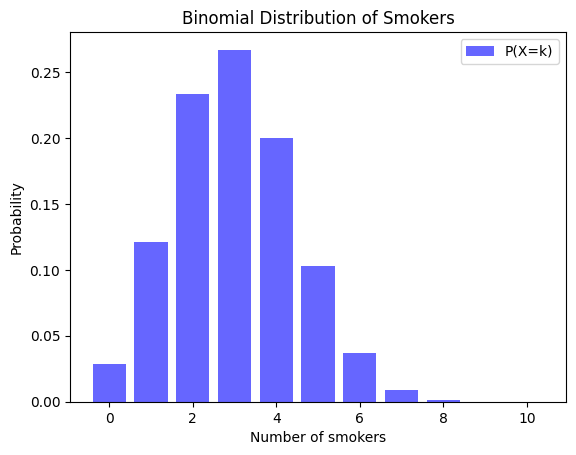

Probability of exactly 5 people with charges above $20,000: 0.1032
Cumulative probability of at most 5: 0.9389


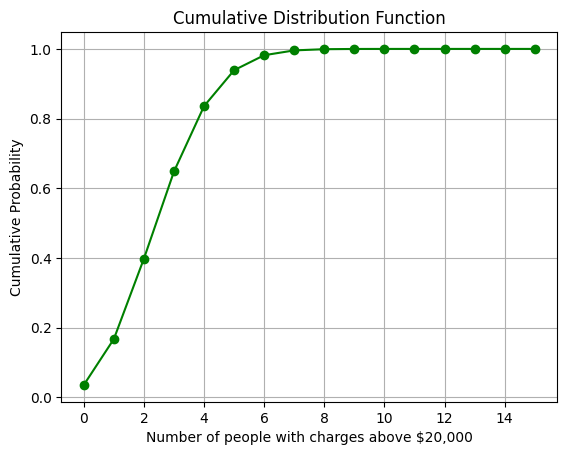

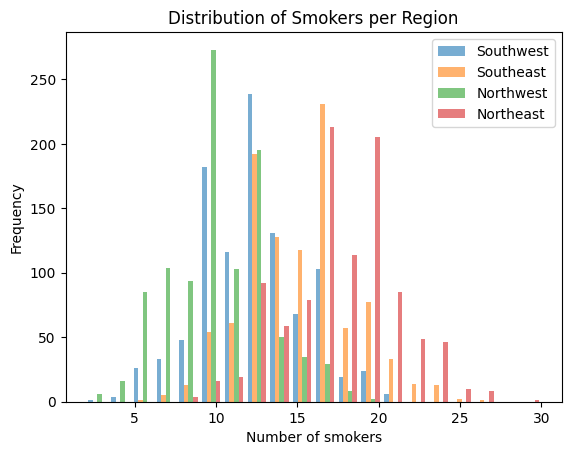

Expected smokers per region: {'Southwest': 12.5, 'Southeast': 15.0, 'Northwest': 10.0, 'Northeast': 17.5}
High-risk charge threshold: 5.0
Probability of selecting 8 high-risk individuals: 0.0058


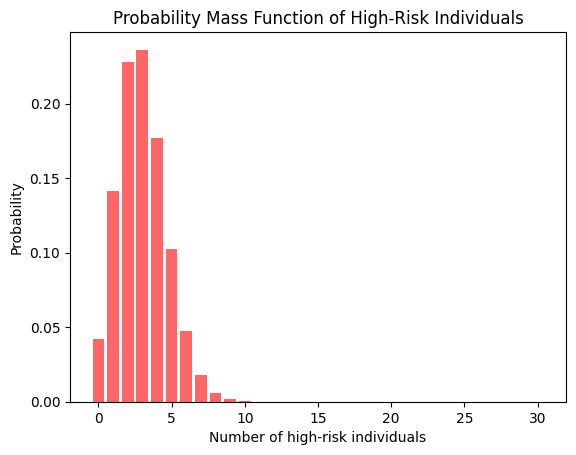

Probability of at least 5 individuals having more than 3 children: 0.5618


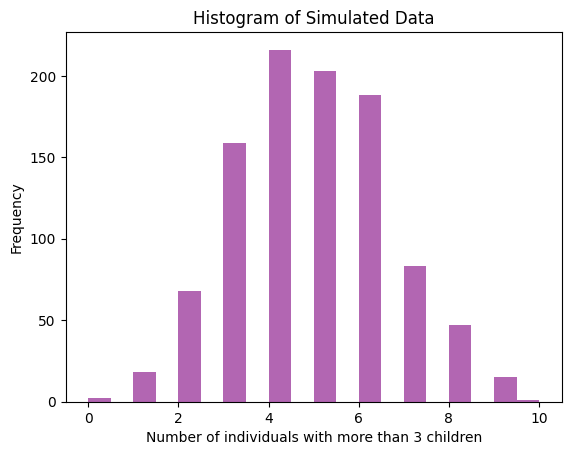

Simulated Mean: 4.74, Theoretical Mean: 4.80
Simulated Variance: 2.94, Theoretical Variance: 2.88


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Question 1(a): Probability of at least 4 smokers in 10 people
n1, p1, k1 = 10, 0.30, 4
prob_4_or_more = 1 - stats.binom.cdf(k1 - 1, n1, p1)
print(f"Probability of at least 4 smokers: {prob_4_or_more:.4f}")

# Question 1(b): Plot Binomial Distribution
x = np.arange(0, n1+1)
y = stats.binom.pmf(x, n1, p1)
plt.bar(x, y, color='blue', alpha=0.6, label='P(X=k)')
plt.xlabel('Number of smokers')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Smokers')
plt.legend()
plt.show()

# Question 2(a): Probability of exactly 5 with charges above $20,000
n2, p2, k2 = 15, 0.20, 5
prob_5_charges = stats.binom.pmf(k2, n2, p2)
print(f"Probability of exactly 5 people with charges above $20,000: {prob_5_charges:.4f}")

# Question 2(b): Cumulative probability at most 5
cumulative_prob_5 = stats.binom.cdf(5, n2, p2)
print(f"Cumulative probability of at most 5: {cumulative_prob_5:.4f}")

# Question 2(c): Plot CDF
x = np.arange(0, n2+1)
y = stats.binom.cdf(x, n2, p2)
plt.plot(x, y, marker='o', linestyle='-', color='green')
plt.xlabel('Number of people with charges above $20,000')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')
plt.grid()
plt.show()

# Question 3(a): Simulating 1000 samples for each region
regions = {'Southwest': 0.25, 'Southeast': 0.30, 'Northwest': 0.20, 'Northeast': 0.35}
n3, samples = 50, 1000
simulated_data = {region: np.random.binomial(n3, p, samples) for region, p in regions.items()}

# Question 3(b): Bar Chart for Simulated Data
plt.hist(simulated_data.values(), bins=20, label=regions.keys(), alpha=0.6)
plt.xlabel('Number of smokers')
plt.ylabel('Frequency')
plt.title('Distribution of Smokers per Region')
plt.legend()
plt.show()

# Question 3(c): Expected smokers
expected_smokers = {region: n3 * p for region, p in regions.items()}
print("Expected smokers per region:", expected_smokers)

# Question 4(a): Finding threshold for top 10% high-risk claims
threshold = np.percentile(np.random.binomial(30, 0.10, 10000), 90)
print(f"High-risk charge threshold: {threshold}")

# Question 4(b): Probability of 8 high-risk individuals in 30 policyholders
prob_8_high_risk = stats.binom.pmf(8, 30, 0.10)
print(f"Probability of selecting 8 high-risk individuals: {prob_8_high_risk:.4f}")

# Question 4(c): PMF Plot
x = np.arange(0, 31)
y = stats.binom.pmf(x, 30, 0.10)
plt.bar(x, y, color='red', alpha=0.6)
plt.xlabel('Number of high-risk individuals')
plt.ylabel('Probability')
plt.title('Probability Mass Function of High-Risk Individuals')
plt.show()

# Question 5(a): Probability of at least 5 individuals with >3 children
n5, p5, k5 = 12, 0.40, 5
prob_at_least_5 = 1 - stats.binom.cdf(k5-1, n5, p5)
print(f"Probability of at least 5 individuals having more than 3 children: {prob_at_least_5:.4f}")

# Question 5(b): Simulating 1000 samples
simulated_children = np.random.binomial(n5, p5, 1000)
plt.hist(simulated_children, bins=20, color='purple', alpha=0.6)
plt.xlabel('Number of individuals with more than 3 children')
plt.ylabel('Frequency')
plt.title('Histogram of Simulated Data')
plt.show()

# Question 5(c): Comparing mean and variance
simulated_mean = np.mean(simulated_children)
simulated_variance = np.var(simulated_children)
theoretical_mean = n5 * p5
theoretical_variance = n5 * p5 * (1 - p5)
print(f"Simulated Mean: {simulated_mean:.2f}, Theoretical Mean: {theoretical_mean:.2f}")
print(f"Simulated Variance: {simulated_variance:.2f}, Theoretical Variance: {theoretical_variance:.2f}")